### Data Exploration

Import

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
from scipy.stats import norm


 Load Data

In [31]:
df = pd.read_csv("../data/AdSmartABdata.csv")
df_control= pd.read_csv("../data/control_df.csv")
df_exposed= pd.read_csv("../data/exposed_df.csv")


In [14]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


Users that did not respond

In [16]:
drop_df= df.query('yes==0 and no==0')
df=df.drop(drop_df.index)


Users awareof the
 brand for both experiment groups

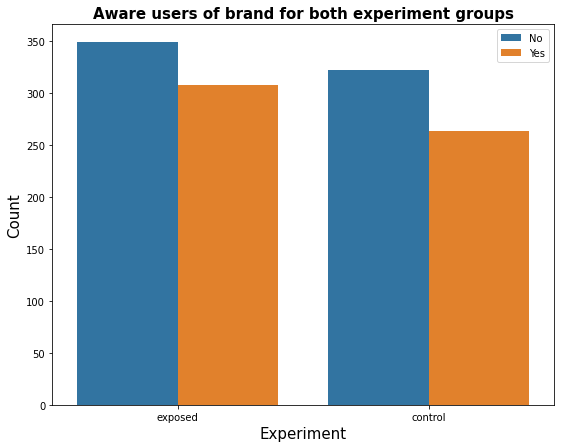

In [17]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x ='experiment', hue='yes', data = df) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Aware users of brand for both experiment groups', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])



From the above figure we can see that most users are not aware of the brand for both experiment groups

<AxesSubplot:ylabel='browser'>

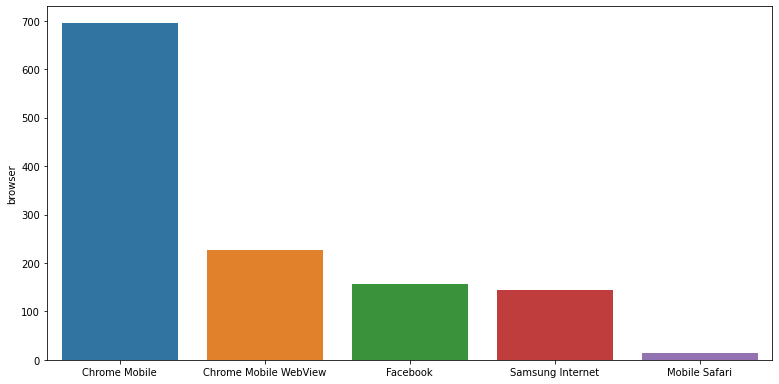

In [18]:
browser = df['browser'].value_counts().head(5)
plt.figure(figsize=(13, 6.5))
sns.barplot(x=browser.index, y=browser)

Above figure shows that most frequently used browser is Chrome Mobile

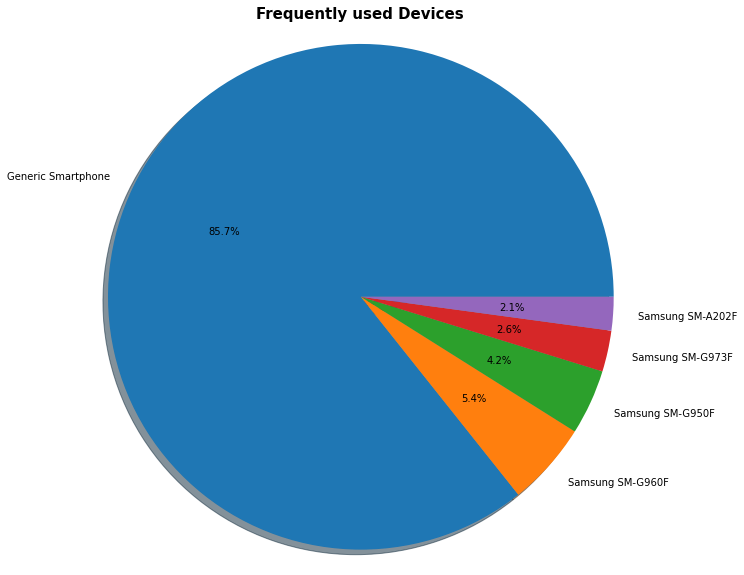

In [19]:
top_device= df['device_make'].value_counts().nlargest(5)
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(top_device.values, labels=top_device.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

ax1.set_title('Frequently used Devices', fontsize=15, fontweight='bold')
plt.show()

Above figure shows the most frequent device types, it shows that 85.7% of the recorded data were from an unkonwn device

/home/nardos/Documents/10Academy/SmartAB/smartAd-abTest/smartenv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Hour')

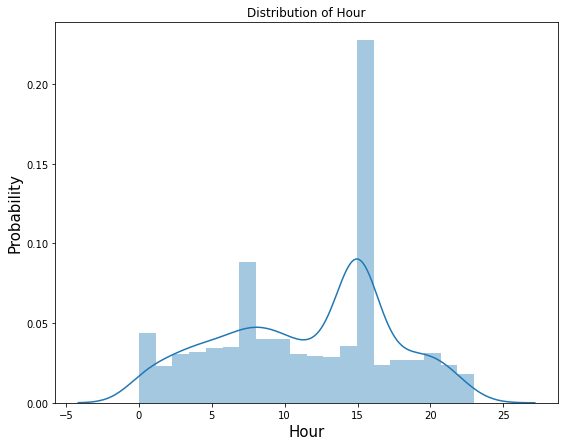

In [22]:
plt.figure(figsize=(9,7))
top_5_device= df['device_make'].value_counts().nlargest(5)
ax=sns.distplot(df['hour'],bins=20) 

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Probability' , fontsize=15)
plt.title('Distribution of Hour')

## Hypothesis Testing

Perform hypothesis testing: apply the classical p-value based algorithm and the sequential A/B testing algorithm for which a starter code is provided..

Classical p-value based algorithm

In [23]:
data = df[["auction_id","experiment","yes"]]
data = data.rename(columns={"yes":"response"})
data

,auction_id,experiment,response
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,0
...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,1
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,0


<Figure size 864x504 with 0 Axes>

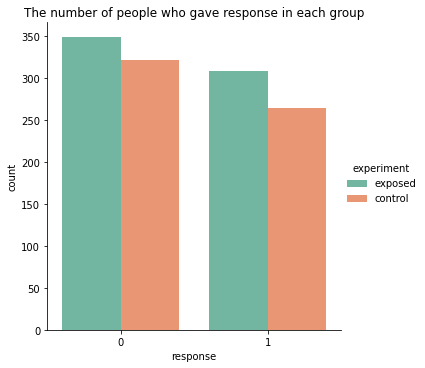

In [26]:
plt.figure(figsize=(12, 7))
sns.catplot(x='response',hue='experiment',data=data,kind='count', palette='Set2')
plt.title("The number of people who gave response in each group")
plt.show()


In [27]:
#get the number of converted from each group
total_exposed = data[data.experiment == "exposed"].count()["response"]
total_control = data[data.experiment == "control"].count()["response"]
success_data = data[data["response"] == 1]
success_exposed_df = success_data[success_data["experiment"] == "exposed"]
success_control_df = success_data[success_data["experiment"] == "control"]
success_control_count = success_control_df.count()["response"]
success_exposed_count = success_exposed_df.count()["response"]

print(success_control_count," people from control group converted from total of ",total_control)
print(success_exposed_count," people from exposed group converted from total of ",total_exposed)

264  people from control group converted from total of  586
308  people from exposed group converted from total of  657


In [28]:
p_exposed_convert = success_exposed_count/total_exposed
p_control_convert = success_control_count/total_control
p_exposed_convert,p_control_convert

(0.4687975646879756, 0.45051194539249145)

In [ ]:
#calculating standard error of both groups
SE_control = np.sqrt((p_control_convert*(1-p_control_convert))/total_control)
SE_exposed = np.sqrt((p_exposed_convert*(1-p_exposed_convert))/total_exposed)
# calculating z_score
Z_score = (p_exposed_convert - p_control_convert)/(np.sqrt(SE_control**2 + SE_exposed**2))
# calculating p_value
p_value = norm.sf(Z_score)
p_value


0.2591726745827285

From the above calculation the p_valuse is aproximatly equal to 0.259 witch is greater than 0.05 (signifcance factor). Thus, doesnt lie in the projection region.

Therefor it means we dont reject our null hypothesis. The smart ad didn't bring the needed effect. which means that our new design did not perform significantly different or better than our old one.

### Data Set

Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment?.

In [ ]:
# # calculating baseline conversion rate
# df['yes'] = df_control.pivot_table(values="yes", index="experiment", aggfunc=lambda x: len(x))
# df['rate'] = df_control.pivot_table(values="yes", index="experiment")
# df
